# Day 45

## Terminologies 

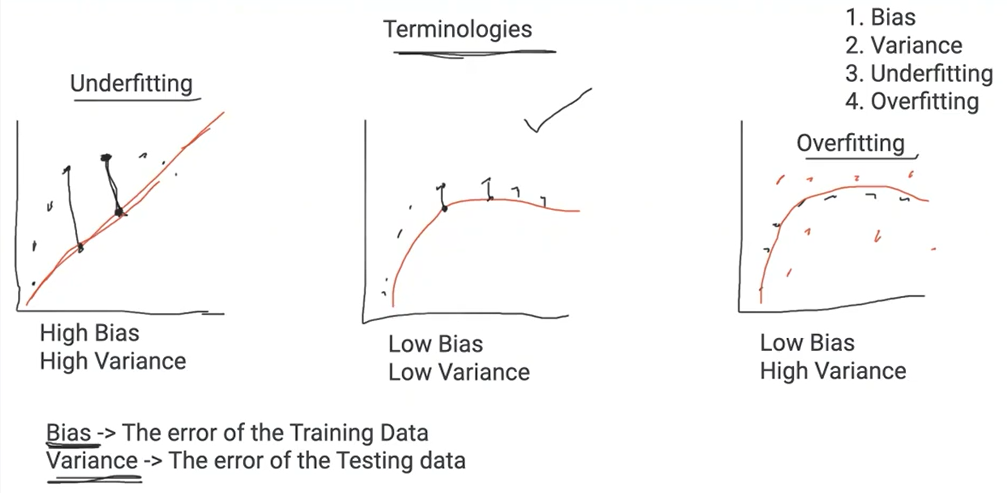
1. Bias
2. Variance
3. Underfitting
4. Overfitting

Example:

| Model-1 | Model-2  | Model-3  |
|--------------------|----------------------|-----------------------|
| Training Error - 25% | Training Error - 1%  | Training Error - <5%  |
| Testing Error - 26%  | Testing Error - 20%  | Testing Error - <5%   |
| High Bias | Low Bias | Low Bias| 
| High Variance | High Variance | Low Variance |




## Random Forest
In random forest we use multiple Decesion Tree

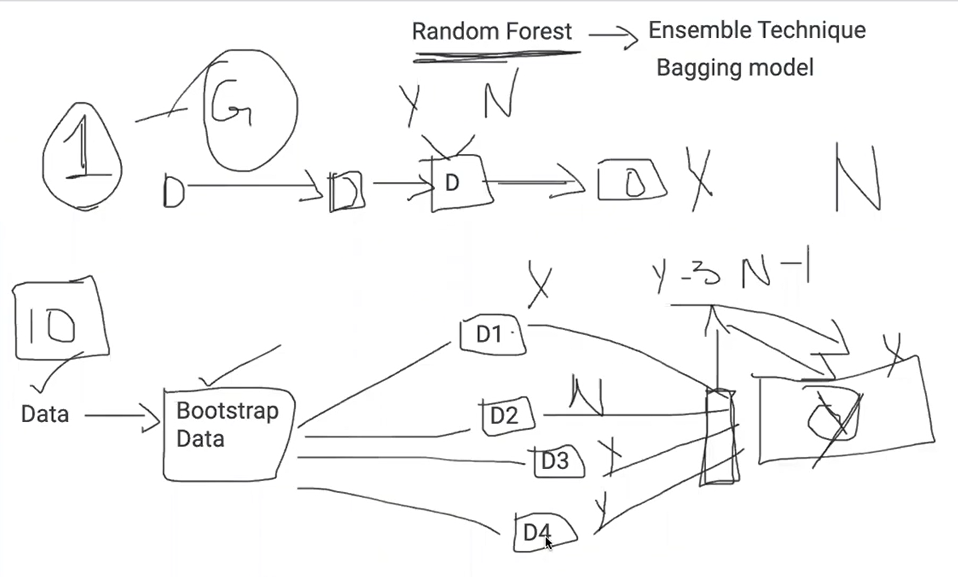
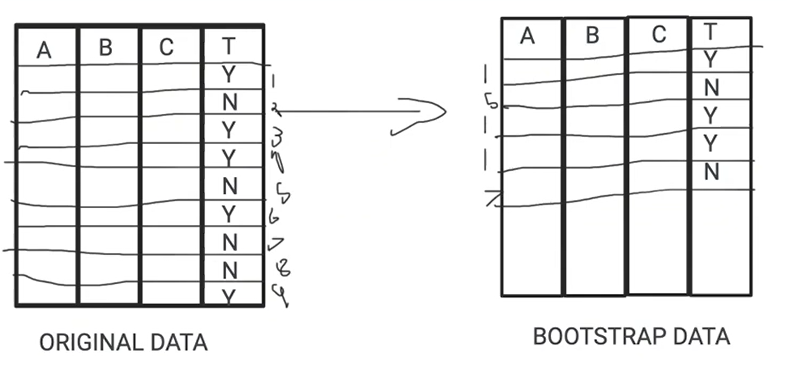
* Properties of Bootstrap:
* Bootstrap data is choosed data Randomely 
* Data can be repeated in the Bootstrap
* It is not necessary that all the entries should be there in Bootstrap data.




Bootstrap is a statistical technique that is used to get a sense of how accurate a sample statistic is likely to be. Let's say you want to know the average age of people in a town, but you don't want to ask everyone in the town. Instead, you take a random sample of 100 people and calculate the average age of those 100 people. But how confident can you be in that number? Is it possible that your sample is biased, and the true average age of the town is actually very different from what you calculated?

This is where bootstrap comes in. With bootstrap, you randomly sample from the original sample (with replacement), to create many new "samples" of the same size. Then, you calculate the average age for each of these new samples. This gives you a sense of how much variation there is in the average age calculation. You can then look at the distribution of these many average age calculations to see how confident you can be that your original sample average is accurate.

Bootstrap is useful in cases where you don't know much about the underlying population, or where the sample size is small. It allows you to get a better sense of how much variation there is in your sample statistic, which can help you make more informed decisions.

## Import Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 

import warnings
warnings.filterwarnings("ignore")

### Import the Datasets

- Link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

## Data Analysis (EDA, DM, DE, DC, DV)

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
df.shape

(500, 2)

In [7]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [8]:
df.isna().sum()

Temperature    0
Revenue        0
dtype: int64

In [9]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


Text(0.5, 1.0, 'Temperature V/s Revenue')

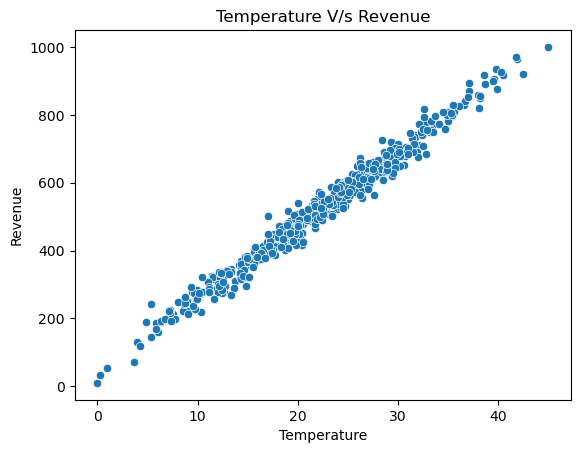

In [15]:
sns.scatterplot(df.Temperature, df.Revenue);
plt.title("Temperature V/s Revenue")

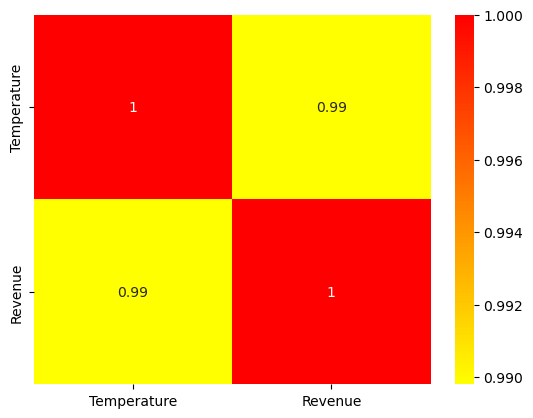

In [18]:
sns.heatmap(df.corr(), annot=True, cmap = 'autumn_r');

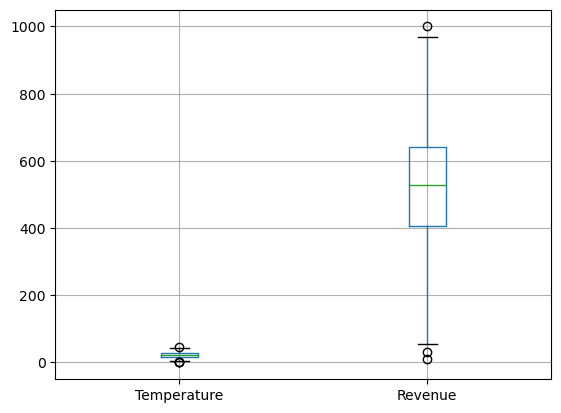

In [22]:
df.boxplot();

## Assigning the Features and Targets:

In [24]:
X = np.array(df.Temperature)
y = np.array(df.Revenue)

## Spliting the Datasets

In [25]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05)

## Model Selection

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model = RandomForestRegressor(n_estimators=10,random_state=0)

## Training the model

In [32]:
model.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

RandomForestRegressor(n_estimators=10, random_state=0)

## Testing the Model

In [33]:
y_pred = model.predict(X_test.reshape(-1,1))

In [34]:
y_pred

array([648.2099977 , 270.02799338, 270.02799338, 403.08895289,
       416.07300164, 637.75064645, 486.82603261, 422.07832592,
       510.05156308, 640.65155347, 397.98727475, 475.79829623,
       403.60998179, 683.29257536, 637.75064645, 509.40167903,
       637.75064645, 270.02799338, 449.61379228, 652.67975424,
       270.02799338, 683.29257536, 556.83217728, 575.28535163,
       514.81101308, 559.08861481, 539.19567612, 559.08861481,
       509.40167903, 479.80016159, 387.0792712 , 683.29257536,
       387.0792712 , 589.97624125, 683.29257536, 338.74888723,
       338.74888723, 397.98727475, 683.29257536, 559.08861481,
       683.29257536, 648.2099977 , 270.02799338, 637.75064645,
       395.88825875, 648.2099977 , 683.29257536, 270.02799338,
       470.56072834, 422.07832592, 652.67975424, 637.75064645,
       683.29257536, 457.58118431, 559.08861481, 446.03603352,
       359.55025047, 644.0855611 , 559.08861481, 648.2099977 ,
       658.976161  , 311.73918404, 323.54483321, 683.29

In [36]:
pred = pd.DataFrame({"Actual":y_test.reshape(-1), "Pred":y_pred.reshape(-1)})

In [37]:
pred

,Actual,Pred
0,615.926650,648.209998
1,242.236208,270.027993
2,274.678921,270.027993
3,501.732990,403.088953
4,409.402802,416.073002
...,...,...
470,654.197406,637.750646
471,559.135869,556.832177
472,603.232942,556.832177
473,410.860905,446.036034


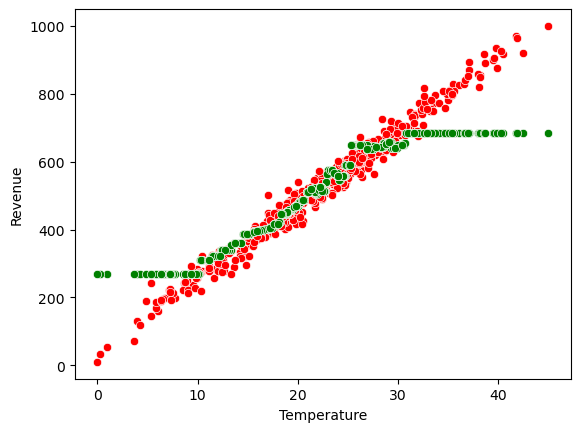

In [44]:
sns.scatterplot(X_test, y_test, color = "red");
sns.scatterplot(X_test, y_pred, color = 'Green');
plt.xlabel("Temperature")
plt.ylabel("Revenue");

In [45]:
# Want to know the co-relation coefficient of y_test and y_pred.

pred.corr()

,Actual,Pred
Actual,1.000000,0.945638
Pred,0.945638,1.000000


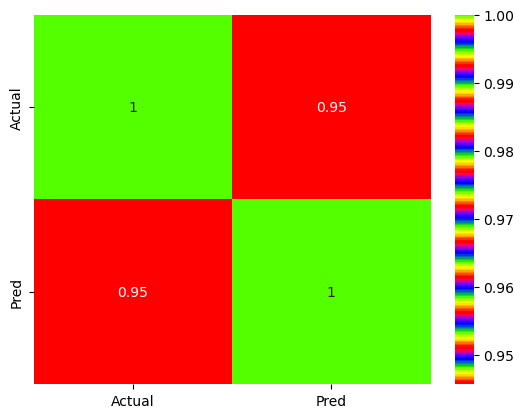

In [46]:
sns.heatmap(pred.corr(), annot=True, cmap = "prism");

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
r2_score(y_test, y_pred)

0.8608541258152891

In [49]:
mean_absolute_error(y_test, y_pred)

42.58521930593683

In [50]:
mean_squared_error(y_test, y_pred)

4406.237342886189

In [51]:
np.sqrt(mean_squared_error(y_test, y_pred))

66.37949489779346